In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

In [3]:
#https://dados.ons.org.br/dataset/fator-capacidade

In [2]:
fc22 = pd.read_csv('FATOR_CAPACIDADE_2022.csv', sep=';')
fc21 = pd.read_csv('FATOR_CAPACIDADE_2021.csv', sep=';')
fc20 = pd.read_csv('FATOR_CAPACIDADE_2020.csv', sep=';')
fc19 = pd.read_csv('FATOR_CAPACIDADE_2019.csv', sep=';')
fc18 = pd.read_csv('FATOR_CAPACIDADE_2018.csv', sep=';')
fc17 = pd.read_csv('FATOR_CAPACIDADE_2017.csv', sep=';')
fc16 = pd.read_csv('FATOR_CAPACIDADE_2016.csv', sep=';')
fc15 = pd.read_csv('FATOR_CAPACIDADE_2015.csv', sep=';')
fc14 = pd.read_csv('FATOR_CAPACIDADE_2014.csv', sep=';')
fc13 = pd.read_csv('FATOR_CAPACIDADE_2013.csv', sep=';')
fc12 = pd.read_csv('FATOR_CAPACIDADE_2012.csv', sep=';')

## Capacidade Instalada Brasil
Fonte: ONS

Legenda:

- Geração: MWmed
- Capacidade instalada> MW
- Fator de capacidade- obtida pela relação entre a geração e a capacidade instalada

#### Capacidade instalada
#### É um parâmetro que se aplica a todas as usinas de geração de eletricidade e representa a maior quantidade de potência que uma usina pode fornecer. A capacidade instalada é medida em MW (megawatts) normalmente.

In [3]:
fc22.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.000,0.237918
1,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,0.000,71.100,0.000000
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,62.804,167.700,0.374502
3,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,0.000,93.555,0.000000
4,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,Conjunto de Usinas,Eólica,Conj. Babilônia,2022-01-01 00:00:00,0.557,136.500,0.004081


In [4]:
fc22.nom_usina_conjunto.value_counts()

Conj. Taíba                       3768
Conj. Aventura                    3768
Conj. Monte do Ronca              3768
Conj. Chapada II                  3768
Conj. Cutia                       3768
                                  ... 
Conj. Morro do Chapéu Sul II-A     360
Conj. Morro do Chapéu Sul II-B     360
Conj. Serra do Mato                360
Conj. Serrote A                    360
Conj. Igaporã II                   144
Name: nom_usina_conjunto, Length: 166, dtype: int64

In [5]:
fc22.groupby(['din_instante','nom_usina_conjunto'])[['val_capacidadeinstalada']].max()

val_capacidadeinstalada
din_instante        nom_usina_conjunto                          
2022-01-01 00:00:00 Alegria I                              51.00
                    Alegria II                            100.65
                    Assú V                                 34.00
                    Cataventos Acaraú I                    28.00
                    Cidreira 1                             85.50
...                                                          ...
2022-06-06 23:00:00 Praia Formosa                         105.00
                    Rei dos Ventos 1                       58.45
                    Rei dos Ventos 3                       60.12
                    São Fernando 4                         83.16
                    Xangri-lá                              31.70

[601200 rows x 1 columns]

In [6]:
fc22.din_instante.value_counts()

2022-06-02 23:00:00    166
2022-06-03 19:00:00    166
2022-06-01 23:00:00    166
2022-06-02 04:00:00    166
2022-06-02 22:00:00    166
                      ... 
2022-02-17 15:00:00    157
2022-02-13 17:00:00    157
2022-01-07 13:00:00    157
2022-02-07 01:00:00    157
2022-01-08 23:00:00    157
Name: din_instante, Length: 3768, dtype: int64

In [7]:
fc22.nom_usina_conjunto.nunique()

166

## The datasets are too big, lets cut it by year:

In [8]:
fc22['din_instante_date'] =  pd.to_datetime(fc22['din_instante'], format='%Y-%m-%d %H:%M:%S')

In [9]:
fc22.groupby(['din_instante_date'])['val_capacidadeinstalada'].sum()

din_instante_date
2022-01-01 00:00:00    23534.357533
2022-01-01 01:00:00    23534.357533
2022-01-01 02:00:00    23534.357533
2022-01-01 03:00:00    23534.357533
2022-01-01 04:00:00    23534.357533
                           ...     
2022-06-06 19:00:00    25201.581533
2022-06-06 20:00:00    25201.581533
2022-06-06 21:00:00    25201.581533
2022-06-06 22:00:00    25201.581533
2022-06-06 23:00:00    25201.581533
Name: val_capacidadeinstalada, Length: 3768, dtype: float64

In [10]:
fc22.groupby(['din_instante_date'])['val_capacidadeinstalada'].sum().sum()

90263995.31381354

In [11]:
avgyear22 = fc22.groupby(['din_instante_date'])['val_capacidadeinstalada'].sum().sum()/len(fc22.groupby(['din_instante_date'])['val_capacidadeinstalada'].sum())

In [12]:
avgyear22

23955.412769058796

In [13]:
def avgyear(df):
    return df.groupby(['din_instante'])['val_capacidadeinstalada'].sum().sum()/len(df.groupby(['din_instante'])['val_capacidadeinstalada'].sum())

In [14]:
avgcap =[]
years = [fc12, fc13, fc14,fc15, fc16, fc17, fc18, fc19, fc20, fc21, fc22]
years2 = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for i in years:
    avgcap.append(avgyear(i))
avgcap

[366.7302573152681,
 432.0717904979966,
 1806.321619919862,
 4337.523029192902,
 7165.54882047391,
 10338.665175796325,
 13560.532473113368,
 16010.140251143046,
 17689.46078475183,
 21186.180591837183,
 23955.412769058796]

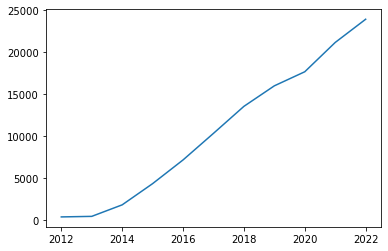

In [15]:
plt.plot(years2, avgcap)

## Now it's too small, lets cut it by month/year

In [16]:
fc22['month'] = pd.DatetimeIndex(fc22['din_instante_date']).month

In [17]:
fc22.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade,din_instante_date,month
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.000,0.237918,2022-01-01,1
1,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,0.000,71.100,0.000000,2022-01-01,1
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,62.804,167.700,0.374502,2022-01-01,1
3,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,0.000,93.555,0.000000,2022-01-01,1
4,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,Conjunto de Usinas,Eólica,Conj. Babilônia,2022-01-01 00:00:00,0.557,136.500,0.004081,2022-01-01,1


In [18]:
df22 = fc22[['nom_usina_conjunto','nom_tipousina','month','val_capacidadeinstalada']]

In [19]:
df22

,nom_usina_conjunto,nom_tipousina,month,val_capacidadeinstalada
0,Conj. Paulino Neves,Eólica,1,426.000
1,Conj. Abil I,Eólica,1,71.100
2,Conj. Araçás,Eólica,1,167.700
3,Conj. Arizona,Eólica,1,93.555
4,Conj. Babilônia,Eólica,1,136.500
...,...,...,...,...
601195,Conj. Pirapora,Solar,6,329.000
601196,Conj. Boa Hora,Solar,6,145.120
601197,Conj. Dracena,Solar,6,81.000
601198,Conj. Guaimbê,Solar,6,150.000


In [20]:
df_agrupado = df22.groupby(['nom_usina_conjunto','month']).max()
df_agrupado

nom_tipousina  val_capacidadeinstalada
nom_usina_conjunto month                                       
Alegria I          1            Eólica                     51.0
                   2            Eólica                     51.0
                   3            Eólica                     51.0
                   4            Eólica                     51.0
                   5            Eólica                     51.0
...                                ...                      ...
Xangri-lá          2            Eólica                     31.7
                   3            Eólica                     31.7
                   4            Eólica                     31.7
                   5            Eólica                     31.7
                   6            Eólica                     31.7

[967 rows x 2 columns]

In [21]:
df_agrupado.groupby('nom_usina_conjunto').max()['val_capacidadeinstalada'].sum()

25217.081533390003

In [22]:
df22 = df_agrupado.groupby(['nom_tipousina','month']).sum()
df22['year']=2022
df22

val_capacidadeinstalada  year
nom_tipousina month                               
Eólica        1                 19204.795200  2022
              2                 19224.695200  2022
              3                 19482.695200  2022
              4                 19602.939200  2022
              5                 20297.087200  2022
              6                 20591.487200  2022
Solar         1                  4381.062333  2022
              2                  4513.062333  2022
              3                  4540.062333  2022
              4                  4540.062333  2022
              5                  4610.094333  2022
              6                  4610.094333  2022

In [82]:
def avgmonth(df):
    df['din_instante_date'] =  pd.to_datetime(df['din_instante'], format='%Y-%m-%d %H:%M:%S')
    df['month'] = pd.DatetimeIndex(df['din_instante_date']).month
    df22 = df[['nom_usina_conjunto','month','val_capacidadeinstalada']]
    df_agrupado = df22.groupby(['nom_usina_conjunto','month']).max()
    df_month = df_agrupado.groupby(['month']).sum().reset_index()
    return df_month

In [83]:
avgmonth(fc22)

,month,val_capacidadeinstalada
0,1,23585.857533
1,2,23737.757533
2,3,24022.757533
3,4,24143.001533
4,5,24907.181533
5,6,25201.581533


In [84]:
dffinal = pd.DataFrame(columns=['month', 'val_capacidadeinstalada', 'year'])
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
bases = [fc12, fc13, fc14,fc15, fc16, fc17, fc18, fc19, fc20, fc21, fc22]

for i in range(len(bases)):
    print(i)
    df_month = avgmonth(bases[i])
    df_month['year']=years[i]
    print (df_month)
    dffinal = pd.concat([dffinal, df_month])


0
    month  val_capacidadeinstalada  year
0       1                   348.90  2012
1       2                   363.75  2012
2       3                   363.75  2012
3       4                   363.75  2012
4       5                   363.75  2012
5       6                   363.75  2012
6       7                   363.75  2012
7       8                   363.75  2012
8       9                   363.75  2012
9      10                   396.75  2012
10     11                   396.75  2012
11     12                   396.75  2012
1
    month  val_capacidadeinstalada  year
0       1                   396.75  2013
1       2                   396.75  2013
2       3                   396.75  2013
3       4                   396.75  2013
4       5                   396.75  2013
5       6                   396.75  2013
6       7                   396.75  2013
7       8                   396.75  2013
8       9                   396.75  2013
9      10                   583.79  2013
10     11   

In [85]:
dffinal

,month,val_capacidadeinstalada,year
0,1,348.900000,2012
1,2,363.750000,2012
2,3,363.750000,2012
3,4,363.750000,2012
4,5,363.750000,2012
...,...,...,...
1,2,23737.757533,2022
2,3,24022.757533,2022
3,4,24143.001533,2022
4,5,24907.181533,2022


In [86]:
dffinal['date'] = str(dffinal['month']) + '/'+ str(dffinal['year'])

In [87]:
dffinal['date'] = pd.to_datetime(dffinal[['year', 'month']].assign(DAY=1))

In [88]:
dffinal

,month,val_capacidadeinstalada,year,date
0,1,348.900000,2012,2012-01-01
1,2,363.750000,2012,2012-02-01
2,3,363.750000,2012,2012-03-01
3,4,363.750000,2012,2012-04-01
4,5,363.750000,2012,2012-05-01
...,...,...,...,...
1,2,23737.757533,2022,2022-02-01
2,3,24022.757533,2022,2022-03-01
3,4,24143.001533,2022,2022-04-01
4,5,24907.181533,2022,2022-05-01


In [89]:
dffinal.to_csv('dfcleanenergy.csv',sep=';',index=False)

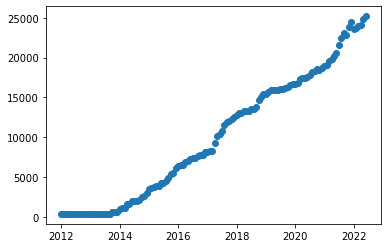

In [90]:
plt.scatter(dffinal.date, dffinal[['val_capacidadeinstalada']])

Text(0, 0.5, 'Capacidade instalada (MW)')

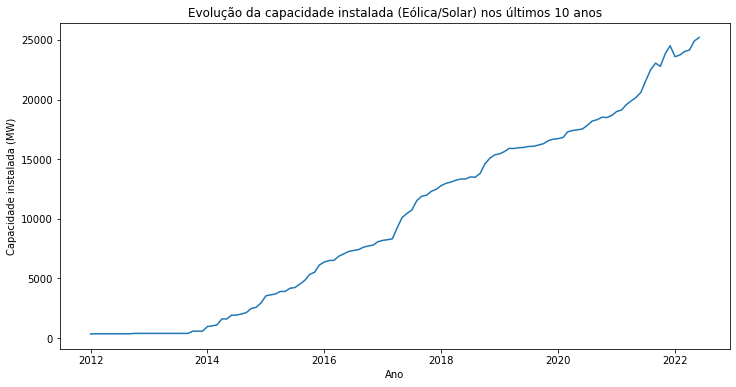

In [91]:
plt.figure(figsize=(12,6))
pyplot.plot(dffinal.date, dffinal.val_capacidadeinstalada)
plt.title("Evolução da capacidade instalada (Eólica/Solar) nos últimos 10 anos")
plt.xlabel("Ano")
plt.ylabel("Capacidade instalada (MW)")

In [92]:
dfcapacidade=dffinal

## Evolução do número de usinas de 2012 até 2022

In [33]:
df_22 = fc22[['nom_tipousina','nom_usina_conjunto','month','val_capacidadeinstalada']]
df_22

,nom_tipousina,nom_usina_conjunto,month,val_capacidadeinstalada
0,Eólica,Conj. Paulino Neves,1,426.000
1,Eólica,Conj. Abil I,1,71.100
2,Eólica,Conj. Araçás,1,167.700
3,Eólica,Conj. Arizona,1,93.555
4,Eólica,Conj. Babilônia,1,136.500
...,...,...,...,...
601195,Solar,Conj. Pirapora,6,329.000
601196,Solar,Conj. Boa Hora,6,145.120
601197,Solar,Conj. Dracena,6,81.000
601198,Solar,Conj. Guaimbê,6,150.000


In [34]:
numusinas = df_22.groupby(['nom_usina_conjunto']).max()

In [35]:
numusinas

,nom_tipousina,month,val_capacidadeinstalada
nom_usina_conjunto,,,
Alegria I,Eólica,6,51.00
Alegria II,Eólica,6,100.65
Assú V,Solar,6,34.00
Cataventos Acaraú I,Eólica,6,28.00
Cidreira 1,Eólica,6,85.50
...,...,...,...
Praia Formosa,Eólica,6,105.00
Rei dos Ventos 1,Eólica,6,58.45
Rei dos Ventos 3,Eólica,6,60.12


In [36]:
numusinas = numusinas.groupby(['nom_tipousina']).agg(Total=('month','count'))

In [37]:
numusinas

,Total
nom_tipousina,
Eólica,137
Solar,29


In [38]:
def numusinas(df):
    df['din_instante_date'] =  pd.to_datetime(df['din_instante'], format='%Y-%m-%d %H:%M:%S')
    df['month'] = pd.DatetimeIndex(df['din_instante_date']).month
    df22 = df[['nom_tipousina','nom_usina_conjunto','month','val_capacidadeinstalada']]
    df_agrupado = df22.groupby(['nom_usina_conjunto']).max()
    df_usinas = df_agrupado.groupby('nom_tipousina').agg(Total=('month','count')).reset_index()
    return df_usinas

In [39]:
dfusinasfinal = pd.DataFrame(columns=['nom_tipousina', 'Total', 'year'])
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
bases = [fc12, fc13, fc14,fc15, fc16, fc17, fc18, fc19, fc20, fc21, fc22]

for i in range(len(bases)):
    print(i)
    df_month = numusinas(bases[i])
    df_month['year']=years[i]
    print (df_month)
    dfusinasfinal = pd.concat([dfusinasfinal, df_month])

0
  nom_tipousina  Total  year
0        Eólica      5  2012
1
  nom_tipousina  Total  year
0        Eólica      8  2013
2
  nom_tipousina  Total  year
0        Eólica     31  2014
3
  nom_tipousina  Total  year
0        Eólica     57  2015
4
  nom_tipousina  Total  year
0        Eólica     71  2016
5
  nom_tipousina  Total  year
0        Eólica     91  2017
1         Solar      7  2017
6
  nom_tipousina  Total  year
0        Eólica    102  2018
1         Solar     15  2018
7
  nom_tipousina  Total  year
0        Eólica    105  2019
1         Solar     20  2019
8
  nom_tipousina  Total  year
0        Eólica    114  2020
1         Solar     21  2020
9
  nom_tipousina  Total  year
0        Eólica    137  2021
1         Solar     28  2021
10
  nom_tipousina  Total  year
0        Eólica    137  2022
1         Solar     29  2022


In [40]:
dfusinasfinal

,nom_tipousina,Total,year
0,Eólica,5,2012
0,Eólica,8,2013
0,Eólica,31,2014
0,Eólica,57,2015
0,Eólica,71,2016
0,Eólica,91,2017
1,Solar,7,2017
0,Eólica,102,2018
1,Solar,15,2018
0,Eólica,105,2019


In [41]:
a = dfusinasfinal.groupby(['year']).sum().reset_index()

In [42]:
a

,year,nom_tipousina,Total
0,2012,Eólica,5
1,2013,Eólica,8
2,2014,Eólica,31
3,2015,Eólica,57
4,2016,Eólica,71
5,2017,EólicaSolar,98
6,2018,EólicaSolar,117
7,2019,EólicaSolar,125
8,2020,EólicaSolar,135
9,2021,EólicaSolar,165


Text(0, 0.5, 'Número de usinas Eólica/Solar')

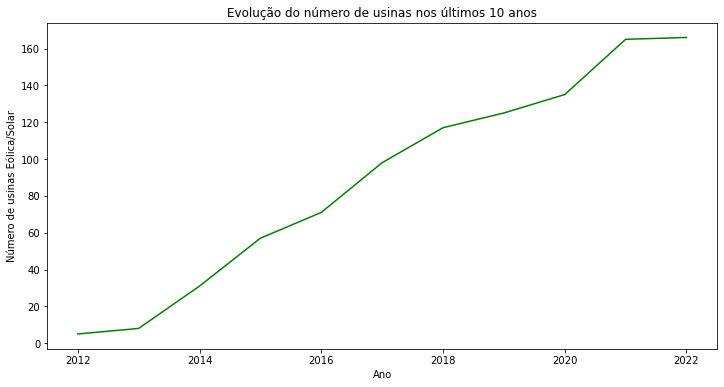

In [43]:
plt.figure(figsize=(12,6))
pyplot.plot(a.year, a.Total, color='green')
plt.title("Evolução do número de usinas nos últimos 10 anos")
plt.xlabel("Ano")
plt.ylabel("Número de usinas Eólica/Solar")

## Total por região, tipo de usina e estado

In [44]:
fc22.groupby(['nom_usina_conjunto']).max()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade,din_instante_date,month
nom_usina_conjunto,,,,,,,,,,,,,,,,
Alegria I,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.115283,-36.384401,Tipo I,Eólica,2022-06-06 23:00:00,44.465,51.00,0.871863,2022-06-06 23:00:00,6
Alegria II,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.097279,-36.402501,Tipo I,Eólica,2022-06-06 23:00:00,57.844,100.65,0.574704,2022-06-06 23:00:00,6
Assú V,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 138 kV (A),Litoral,-5.546004,-37.026390,Tipo II-B,Solar,2022-06-06 23:00:00,32.324,34.00,0.950706,2022-06-06 23:00:00,6
Cataventos Acaraú I,NE,Nordeste,CE,CEARA,ACARAU II - 230 kV (A),Litoral,-2.860092,-40.068409,Tipo II-B,Eólica,2022-06-06 23:00:00,23.577,28.00,0.842036,2022-06-06 23:00:00,6
Cidreira 1,S,Sul,RS,RIO GRANDE DO SUL,OSORIO 2 - 69 kV (A),NaN,-30.079059,-50.172056,Tipo II-B,Eólica,2022-06-06 23:00:00,71.488,85.50,1.021257,2022-06-06 23:00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Praia Formosa,NE,Nordeste,CE,CEARA,SOBRAL III - 230 kV (A),Litoral,-2.919422,-41.031650,Tipo I,Eólica,2022-06-06 23:00:00,85.005,105.00,0.809571,2022-06-06 23:00:00,6
Rei dos Ventos 1,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.100897,-36.202069,Tipo I,Eólica,2022-06-06 23:00:00,50.566,58.45,0.865115,2022-06-06 23:00:00,6
Rei dos Ventos 3,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.118831,-36.163206,Tipo I,Eólica,2022-06-06 23:00:00,48.208,60.12,0.801863,2022-06-06 23:00:00,6


In [45]:
fc22.groupby(['nom_usina_conjunto']).max().sum()

id_subsistema              NENENENESNENENENENENENENENENENESNENENENENENENE...
nom_subsistema             NordesteNordesteNordesteNordesteSulNordesteNor...
id_estado                  RNRNRNCERSBACERNCERNCEPIBARNBARNRSRNBABABABARN...
nom_estado                 RIO GRANDE DO NORTERIO GRANDE DO NORTERIO GRAN...
val_latitude                                                    -1649.109326
val_longitude                                                   -6705.378732
nom_modalidadeoperacao     Tipo ITipo ITipo II-BTipo II-BTipo II-BConjunt...
nom_tipousina              EólicaEólicaSolarEólicaEólicaEólicaEólicaEólic...
din_instante               2022-06-06 23:00:002022-06-06 23:00:002022-06-...
val_geracao                                                        23633.709
val_capacidadeinstalada                                         25217.081533
val_fatorcapacidade                                               154.475219
month                                                                    996

In [46]:
fc22.groupby(['nom_usina_conjunto','nom_tipousina','nom_subsistema','nom_estado'])[['val_capacidadeinstalada']].max().sum()

val_capacidadeinstalada    25217.081533
dtype: float64

In [47]:
(fc22.groupby(['nom_usina_conjunto','nom_tipousina','nom_subsistema','nom_estado'])[['val_capacidadeinstalada']].max().sort_values(by='val_capacidadeinstalada', ascending=False)).groupby(['nom_subsistema','nom_estado']).sum().sort_values(by='val_capacidadeinstalada', ascending=False)

val_capacidadeinstalada
nom_subsistema       nom_estado                                  
Nordeste             BAHIA                            7205.483000
                     RIO GRANDE DO NORTE              6495.697000
                     PIAUI                            3562.769333
                     CEARA                            2816.627200
Sul                  RIO GRANDE DO SUL                1729.890000
Nordeste             PERNAMBUCO                        891.235000
Sudeste/Centro-Oeste MINAS GERAIS                      654.500000
Nordeste             PARAIBA                           633.240000
Sudeste/Centro-Oeste SAO PAULO                         579.640000
Norte                MARANHAO                          426.000000
Sul                  SANTA CATARINA                    222.000000

In [48]:
(fc22.groupby(['nom_usina_conjunto','nom_tipousina','nom_subsistema','nom_estado'])[['val_capacidadeinstalada']].max().sort_values(by='val_capacidadeinstalada', ascending=False)).groupby('nom_tipousina').sum()

,val_capacidadeinstalada
nom_tipousina,
Eólica,20606.987200
Solar,4610.094333


In [49]:
#https://dados.ons.org.br/dataset/capacidade-geracao

In [50]:
capger = pd.read_csv('CAPACIDADE_GERACAO.csv', sep=';')

Legenda:

- val_potenciaefetiva: Potência Nominal da Unidade Geradora, Conforme Documento Normativo da ANEEL, em MW

In [51]:
capger.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,HIDRÁULICA,1997-08-22,1997-08-22,NaN,527.0
1,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,HIDRÁULICA,1996-12-20,1996-12-20,NaN,527.0
2,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,HIDRÁULICA,1996-07-31,1996-07-31,NaN,527.0
3,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,HIDRÁULICA,1995-10-26,1995-10-26,NaN,527.0
4,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,HIDRÁULICA,1995-01-31,1995-01-31,NaN,527.0


In [52]:
capger.nom_tipousina.value_counts()

EOLIELÉTRICA     1480
TÉRMICA          1355
HIDROELÉTRICA     832
FOTOVOLTAICA      271
BOMBEAMENTO         8
NUCLEAR             2
Name: nom_tipousina, dtype: int64

In [53]:
capger.groupby(['nom_tipousina'])[['val_potenciaefetiva']].sum().sort_values(by='val_potenciaefetiva', ascending=False)

,val_potenciaefetiva
nom_tipousina,
HIDROELÉTRICA,110252.084100
TÉRMICA,34525.649900
EOLIELÉTRICA,20758.565200
FOTOVOLTAICA,4517.294333
NUCLEAR,1990.000000
BOMBEAMENTO,118.500000


In [54]:
worldclean = pd.read_excel('worldcleanenergy.xlsx')

In [55]:
worldclean.head()

,Country 2020,Wind,Solar,Other renewables*,Total
0,NaN,NaN,NaN,NaN,NaN
1,Canada,36.102475,4.424325,10.694889,51.221689
2,Mexico,19.706818,11.873530,7.596100,39.176448
3,US,340.919005,133.970707,76.825458,551.715170
4,Argentina,9.470298,1.344341,0.413941,11.228580


In [56]:
worldclean.shape

(71, 5)

In [57]:
captipousina = pd.read_csv('usinas.csv', sep=';')

In [58]:
captipousina

,nom_tipousina,% do total de Val Capacinstaladaconmw,Val Capacinstaladaconmw,Soma de Zero
0,Eólica,"10,81%","18.128,10",0
1,Nuclear,"1,19%",1.990,0
2,Hidrelétrica,"64,78%","108.594,36",0
3,Solar,"1,98%","3.324,18",0
4,Térmica,"21,23%","35.590,74",0
5,NaN,100%,"167.627,38",0


## Geração no Brasil Eólica e Solar

In [67]:
def avggeracao(df):
    df['din_instante_date'] =  pd.to_datetime(df['din_instante'], format='%Y-%m-%d %H:%M:%S')
    df['month'] = pd.DatetimeIndex(df['din_instante_date']).month
    df22 = df[['nom_usina_conjunto','month','val_geracao']]
    df_agrupado = df22.groupby(['nom_usina_conjunto','month']).max()
    df_month = df_agrupado.groupby(['month']).sum().reset_index()
    return df_month

In [70]:
dffinal = pd.DataFrame(columns=['month', 'val_geracao', 'year'])

In [76]:
dffinal = pd.DataFrame(columns=['month', 'val_geracao', 'year'])
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
bases = [fc12, fc13, fc14,fc15, fc16, fc17, fc18, fc19, fc20, fc21, fc22]

for i in range(len(bases)):
    print(i)
    df_month = avggeracao(bases[i])
    df_month['year']=years[i]
    print (df_month)
    dffinal = pd.concat([dffinal, df_month])


0
    month  val_geracao  year
0       1      265.487  2012
1       2      289.258  2012
2       3      281.404  2012
3       4      281.347  2012
4       5      290.097  2012
5       6      288.236  2012
6       7      287.253  2012
7       8      295.861  2012
8       9      293.982  2012
9      10      307.126  2012
10     11      324.680  2012
11     12      343.455  2012
1
    month  val_geracao  year
0       1      360.488  2013
1       2      360.774  2013
2       3      362.746  2013
3       4      342.089  2013
4       5      334.075  2013
5       6      325.018  2013
6       7      332.062  2013
7       8      346.646  2013
8       9      359.805  2013
9      10      413.341  2013
10     11      474.285  2013
11     12      508.200  2013
2
    month  val_geracao  year
0       1   688.964856  2014
1       2   716.357022  2014
2       3   767.989677  2014
3       4   984.998589  2014
4       5   991.544882  2014
5       6  1371.741938  2014
6       7  1567.844814  2014
7       

In [73]:
dfgeracao = dffinal
dfgeracao

,month,val_geracao,year
0,1,265.487,2012
1,2,289.258,2012
2,3,281.404,2012
3,4,281.347,2012
4,5,290.097,2012
...,...,...,...
1,2,20897.537,2022
2,3,20795.774,2022
3,4,20638.915,2022
4,5,21539.253,2022


In [77]:
dfgeracao['date'] = pd.to_datetime(dfgeracao[['year', 'month']].assign(DAY=1))
dfgeracao

,month,val_geracao,year,date
0,1,265.487,2012,2012-01-01
1,2,289.258,2012,2012-02-01
2,3,281.404,2012,2012-03-01
3,4,281.347,2012,2012-04-01
4,5,290.097,2012,2012-05-01
...,...,...,...,...
1,2,20897.537,2022,2022-02-01
2,3,20795.774,2022,2022-03-01
3,4,20638.915,2022,2022-04-01
4,5,21539.253,2022,2022-05-01


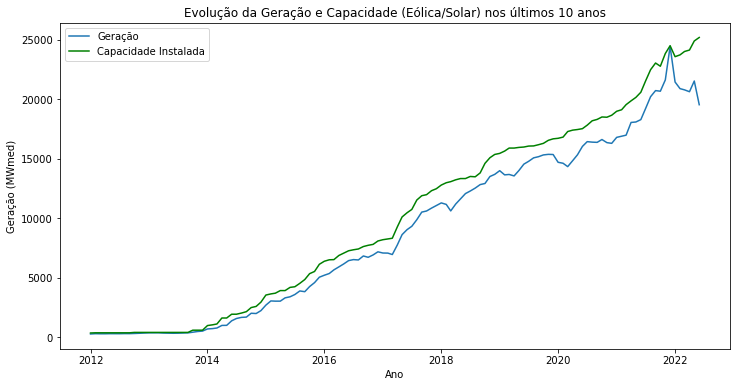

In [97]:
plt.figure(figsize=(12,6))
pyplot.plot(dfgeracao.date, dfgeracao.val_geracao, label='Geração')
plt.title("Evolução da Geração e Capacidade (Eólica/Solar) nos últimos 10 anos")
pyplot.plot(dfcapacidade.date, dfcapacidade.val_capacidadeinstalada, color ='green', label='Capacidade Instalada')
plt.xlabel("Ano")
plt.ylabel("Geração (MWmed)")
plt.legend()

In [94]:
dfcapger = dfgeracao

In [95]:
dfcapger['capacidade_instalada'] = dfcapacidade['val_capacidadeinstalada']

In [96]:
dfcapger

,month,val_geracao,year,date,capacidade_instalada
0,1,265.487,2012,2012-01-01,348.900000
1,2,289.258,2012,2012-02-01,363.750000
2,3,281.404,2012,2012-03-01,363.750000
3,4,281.347,2012,2012-04-01,363.750000
4,5,290.097,2012,2012-05-01,363.750000
...,...,...,...,...,...
1,2,20897.537,2022,2022-02-01,23737.757533
2,3,20795.774,2022,2022-03-01,24022.757533
3,4,20638.915,2022,2022-04-01,24143.001533
4,5,21539.253,2022,2022-05-01,24907.181533


In [98]:
dfcapger.to_csv('dfcapger.csv',sep=';',index=False)

In [61]:
#our world in data

In [62]:
#https://ourworldindata.org/global-energy-200-years

In [63]:
globalsubs = pd.read_csv('global_energy_substitution.csv')

In [64]:
globalsubs

,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy)
0,World,OWID_WRL,1800,0,0,0,0,5556,0,0,0,97,0
1,World,OWID_WRL,1810,0,0,0,0,5833,0,0,0,128,0
2,World,OWID_WRL,1820,0,0,0,0,6111,0,0,0,153,0
3,World,OWID_WRL,1830,0,0,0,0,6389,0,0,0,264,0
4,World,OWID_WRL,1840,0,0,0,0,6944,0,0,0,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,World,OWID_WRL,2015,2104,50892,6516,9827,11111,1362,937,650,43844,34781
68,World,OWID_WRL,2016,2424,51920,6576,10092,11111,1378,970,825,43196,35589
69,World,OWID_WRL,2017,2852,52568,6596,10165,11111,1457,1012,1117,43360,36586
70,World,OWID_WRL,2018,3157,53181,6711,10368,11111,1529,1109,1448,44109,38517


In [65]:
globalsubs.columns

Index(['Entity', 'Code', 'Year', 'Wind (TWh; substituted energy)',
       'Oil (TWh; substituted energy)', 'Nuclear (TWh; substituted energy)',
       'Hydropower (TWh; substituted energy)',
       'Traditional bimass (TWh; substituted energy)',
       'Other renewables (TWh; substituted energy)',
       'Biofuels (TWh; substituted energy)', 'Solar (TWh; substituted energy)',
       'Coal (TWh; substituted energy)', 'Gas (TWh; substituted energy)'],
      dtype='object')

In [66]:
globalsubs.rename(columns = {'Wind (TWh; substituted energy)':'Wind', 'Oil (TWh; substituted energy)':'Oil', 'Nuclear (TWh; substituted energy)': 'Nuclear', 'Hydropower (TWh; substituted energy)': 'Hydropower','Traditional bimass (TWh; substituted energy)': 'Biomass', 'Other renewables (TWh; substituted energy)':'Other_renewables', 'Biofuels (TWh; substituted energy)': 'Biofuels', 'Solar (TWh; substituted energy)':'Solar', 'Coal (TWh; substituted energy)':'Coal', 'Gas (TWh; substituted energy)':'Gas' }, inplace = True)

In [67]:
globalsubs.columns

Index(['Entity', 'Code', 'Year', 'Wind', 'Oil', 'Nuclear', 'Hydropower',
       'Biomass', 'Other_renewables', 'Biofuels', 'Solar', 'Coal', 'Gas'],
      dtype='object')

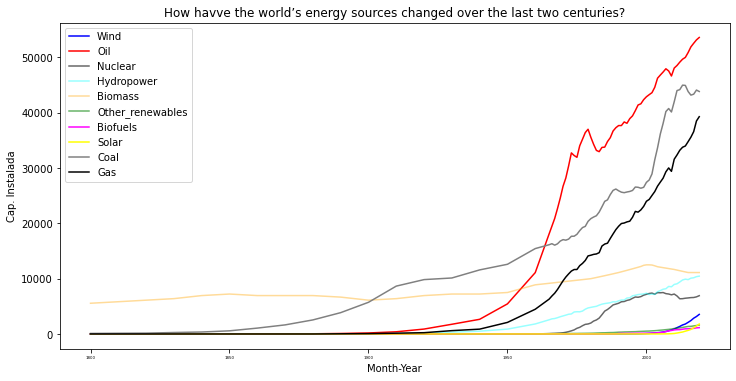

In [68]:
plt.figure(figsize=(12,6))
plt.plot(globalsubs.Year, globalsubs.Wind, alpha=1, color='blue', label='Wind')
plt.plot(globalsubs.Year, globalsubs.Oil, alpha=1, color='red', label='Oil')
plt.plot(globalsubs.Year, globalsubs.Nuclear, alpha=0.6, color='black', label='Nuclear')
plt.plot(globalsubs.Year, globalsubs.Hydropower, alpha=0.4, color='cyan', label='Hydropower')
plt.plot(globalsubs.Year, globalsubs.Biomass, alpha=0.4, color='orange', label='Biomass')
plt.plot(globalsubs.Year, globalsubs.Other_renewables, alpha=0.6, color='green', label='Other_renewables')
plt.plot(globalsubs.Year, globalsubs.Biofuels, color='magenta', label='Biofuels')
plt.plot(globalsubs.Year, globalsubs.Solar, color='yellow', label='Solar')
plt.plot(globalsubs.Year, globalsubs.Coal, color='grey', label='Coal')
plt.plot(globalsubs.Year, globalsubs.Gas, color='black', label='Gas')
plt.title("How havve the world’s energy sources changed over the last two centuries?")
plt.xlabel("Month-Year")
plt.ylabel("Cap. Instalada")
plt.xticks(fontsize=4)
plt.legend()
plt.show()

In [69]:
#https://ourworldindata.org/sources-global-energy

In [70]:
primary = pd.read_csv('primaryenergysourcebar.csv')

In [71]:
primary

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh
0,Africa,NaN,1965,323.496138,327.333164,9.543754,0.000000,38.626764,0.000000,0.000000,0.000000
1,Africa,NaN,1966,323.122193,358.132674,10.669916,0.000000,43.083345,0.000000,0.000000,0.000000
2,Africa,NaN,1967,330.291585,355.281459,10.545670,0.000000,44.973990,0.000000,0.000000,0.000000
3,Africa,NaN,1968,343.512911,374.852131,10.688970,0.000000,52.606502,0.000000,0.000000,0.000000
4,Africa,NaN,1969,346.642922,379.973086,12.492000,0.000000,61.391360,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4998,World,OWID_WRL,2016,43501.654556,51908.105111,35586.370667,6573.431011,10106.126783,2419.802622,825.820790,560.681082
4999,World,OWID_WRL,2017,43721.381222,52640.103972,36536.593944,6593.086728,10166.795689,2850.777372,1115.135411,593.790980
5000,World,OWID_WRL,2018,44238.975333,53146.716556,38378.961722,6702.019547,10380.656056,3155.241097,1433.943159,632.173911
5001,World,OWID_WRL,2019,43788.651056,53302.646333,39039.402361,6924.992211,10469.154283,3511.696050,1752.959449,663.134292


## GERAÇÃO POR USINA EM BASE HORÁRIA

In [81]:
#https://dados.ons.org.br/dataset/geracao-usina

#Carga Própria de Energia (MWmed) - Demanda média requerida de uma instalação ou conjunto de instalações durante um período de referência - (relação entre a eletricidade gerada em MWh e o tempo de funcionamento das instalações)

In [125]:
ger22 = pd.read_csv('Geracao_Usina_2022.csv', sep=';')
ger21 = pd.read_csv('Geracao_Usina_2021.csv', sep=';')
ger20 = pd.read_csv('Geracao_Usina_2020.csv', sep=';')
ger19 = pd.read_csv('Geracao_Usina_2019.csv', sep=';')
ger18 = pd.read_csv('Geracao_Usina_2018.csv', sep=';')
ger17 = pd.read_csv('Geracao_Usina_2017.csv', sep=';')
ger16 = pd.read_csv('Geracao_Usina_2016.csv', sep=';')
ger15 = pd.read_csv('Geracao_Usina_2015.csv', sep=';')
ger14 = pd.read_csv('Geracao_Usina_2014.csv', sep=';')
ger13 = pd.read_csv('Geracao_Usina_2013.csv', sep=';')
ger12 = pd.read_csv('Geracao_Usina_2013.csv', sep=';')

In [126]:
ger22

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao
0,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,107.881
1,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Aparecida,UTE.PE.AM.027250-7.01,78.711
2,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Mauá 3,UTE.GN.AM.031888-4.01,372.854
3,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Jaraqui,UTE.GN.AM.029272-9.01,64.465
4,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Ponta Negra,UTE.PE.AM.029361-0.01,65.932
...,...,...,...,...,...,...,...,...,...,...,...
1611715,2022-04-26 23:00:00,SE,SUDESTE,SP,SAO PAULO,TIPO I,TÉRMICA,Gás,Cubatão,UTE.GN.SP.028014-3.01,88.542
1611716,2022-04-26 23:00:00,SE,SUDESTE,SP,SAO PAULO,TIPO II-B,TÉRMICA,Biomassa,Vale do Paraná,UTE.AI.SP.035073-7.01,0.000
1611717,2022-04-26 23:00:00,SE,SUDESTE,TO,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,Peixe Angical,UHE.PH.TO.028353-3.01,207.297
1611718,2022-04-26 23:00:00,SE,SUDESTE,TO,TOCANTINS,TIPO I,HIDROELÉTRICA,Hidráulica,Lajeado,UHE.PH.TO.001304-8.01,513.560


In [103]:
ger22.nom_tipousina.value_counts()

HIDROELÉTRICA    567552
TÉRMICA          495456
EOLIELÉTRICA     422136
FOTOVOLTAICA     121008
NUCLEAR            5568
Name: nom_tipousina, dtype: int64

In [104]:
ger22['din_instante_date'] =  pd.to_datetime(ger22['din_instante'], format='%Y-%m-%d %H:%M:%S')

In [105]:
ger22.head(20)

,din_instante,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao,din_instante_date
0,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,107.881,2022-01-01
1,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Aparecida,UTE.PE.AM.027250-7.01,78.711,2022-01-01
2,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Mauá 3,UTE.GN.AM.031888-4.01,372.854,2022-01-01
3,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Jaraqui,UTE.GN.AM.029272-9.01,64.465,2022-01-01
4,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Ponta Negra,UTE.PE.AM.029361-0.01,65.932,2022-01-01
5,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Cristiano Rocha,UTE.PE.AM.029499-3.01,73.105,2022-01-01
6,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Manauara,UTE.GN.AM.029432-2.01,62.965,2022-01-01
7,2022-01-01 00:00:00,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Tambaqui,UTE.PE.AM.029276-1.01,60.820,2022-01-01
8,2022-01-01 00:00:00,N,NORTE,AP,AMAPA,TIPO I,HIDROELÉTRICA,Hidráulica,Cachoeira Caldeirão,UHE.PH.AP.031186-3.01,134.967,2022-01-01
9,2022-01-01 00:00:00,N,NORTE,AP,AMAPA,TIPO I,HIDROELÉTRICA,Hidráulica,Ferreira Gomes,UHE.PH.AP.030385-2.01,159.959,2022-01-01


In [106]:
ger22.shape

(1611720, 12)

In [107]:
ger22['month'] = pd.DatetimeIndex(ger22['din_instante_date']).month

In [108]:
ger22 = ger22[['nom_usina','nom_tipousina', 'nom_tipocombustivel', 'month', 'val_geracao']]
ger22

,nom_usina,nom_tipousina,nom_tipocombustivel,month,val_geracao
0,Balbina,HIDROELÉTRICA,Hidráulica,1,107.881
1,Aparecida,TÉRMICA,Gás,1,78.711
2,Mauá 3,TÉRMICA,Gás,1,372.854
3,Jaraqui,TÉRMICA,Gás,1,64.465
4,Ponta Negra,TÉRMICA,Gás,1,65.932
...,...,...,...,...,...
1611715,Cubatão,TÉRMICA,Gás,4,88.542
1611716,Vale do Paraná,TÉRMICA,Biomassa,4,0.000
1611717,Peixe Angical,HIDROELÉTRICA,Hidráulica,4,207.297
1611718,Lajeado,HIDROELÉTRICA,Hidráulica,4,513.560


In [109]:
df_agrupado = ger22.groupby(['nom_usina','month']).max()
df_agrupado

nom_tipousina nom_tipocombustivel  val_geracao
nom_usina     month                                                
14 de Julho   1      HIDROELÉTRICA          Hidráulica       45.600
              2      HIDROELÉTRICA          Hidráulica       31.900
              3      HIDROELÉTRICA          Hidráulica       98.696
              4      HIDROELÉTRICA          Hidráulica       98.712
Aimorés       1      HIDROELÉTRICA          Hidráulica      310.169
...                            ...                 ...          ...
Ypê           4      HIDROELÉTRICA          Hidráulica       27.081
Água Vermelha 1      HIDROELÉTRICA          Hidráulica      910.544
              2      HIDROELÉTRICA          Hidráulica     1124.072
              3      HIDROELÉTRICA          Hidráulica     1324.334
              4      HIDROELÉTRICA          Hidráulica     1000.151

[2312 rows x 3 columns]

In [110]:
df_agrupado.groupby('nom_usina').max()['val_geracao'].sum()

143952.984

In [111]:
ger22 = df_agrupado.groupby(['nom_tipousina','month']).sum()
ger22['year']=2022
ger22

val_geracao  year
nom_tipousina month                   
EOLIELÉTRICA  1        19358.812  2022
              2        18367.383  2022
              3        18362.425  2022
              4        17858.012  2022
FOTOVOLTAICA  1         4099.174  2022
              2         4213.875  2022
              3         4220.991  2022
              4         4240.108  2022
HIDROELÉTRICA 1        84720.003  2022
              2        88912.906  2022
              3        91053.916  2022
              4        88343.732  2022
NUCLEAR       1         2007.238  2022
              2         2004.150  2022
              3         2007.508  2022
              4         2006.865  2022
TÉRMICA       1        15098.679  2022
              2        13168.423  2022
              3        12095.835  2022
              4         9559.546  2022

In [141]:
def allusmonth(df):
    df['din_instante_date'] =  pd.to_datetime(df['din_instante'], format='%Y-%m-%d %H:%M:%S')
    df['month'] = pd.DatetimeIndex(df['din_instante_date']).month
    ger22 = df[['nom_usina','nom_tipousina', 'nom_tipocombustivel', 'month', 'val_geracao']]
    df_agrupado = ger22.groupby(['nom_usina','month']).max()
    df_year = df_agrupado.groupby(['nom_tipousina','month']).sum().reset_index()

    return df_year

In [142]:
allusmonth(ger12)

,nom_tipousina,month,val_geracao
0,EOLIELÉTRICA,1,1132.8250
1,EOLIELÉTRICA,2,1149.8360
2,EOLIELÉTRICA,3,1200.4810
3,EOLIELÉTRICA,4,1168.5590
4,EOLIELÉTRICA,5,1159.0110
5,EOLIELÉTRICA,6,1142.5260
6,EOLIELÉTRICA,7,1182.8200
7,EOLIELÉTRICA,8,1204.8630
8,EOLIELÉTRICA,9,1263.8650
9,EOLIELÉTRICA,10,1365.3360


In [143]:
dfallus = pd.DataFrame(columns=['nom_tipousina','month', 'val_geracao', 'year'])

In [144]:
dfallus

,nom_tipousina,month,val_geracao,year


In [145]:

years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
bases = [ger12, ger13, ger14,ger15, ger16,ger17, ger18, ger19, ger20, ger21, ger22]

for i in range(len(bases)):
    print(i)
    df_month = allusmonth(bases[i])
    df_month['year']=years[i]
    print (df_month)
    dfallus = pd.concat([dfallus, df_month])

0
    nom_tipousina  month  val_geracao  year
0    EOLIELÉTRICA      1    1132.8250  2012
1    EOLIELÉTRICA      2    1149.8360  2012
2    EOLIELÉTRICA      3    1200.4810  2012
3    EOLIELÉTRICA      4    1168.5590  2012
4    EOLIELÉTRICA      5    1159.0110  2012
5    EOLIELÉTRICA      6    1142.5260  2012
6    EOLIELÉTRICA      7    1182.8200  2012
7    EOLIELÉTRICA      8    1204.8630  2012
8    EOLIELÉTRICA      9    1263.8650  2012
9    EOLIELÉTRICA     10    1365.3360  2012
10   EOLIELÉTRICA     11    1434.1380  2012
11   EOLIELÉTRICA     12    1471.0110  2012
12  HIDROELÉTRICA      1   75663.7390  2012
13  HIDROELÉTRICA      2   74412.9560  2012
14  HIDROELÉTRICA      3   75137.4910  2012
15  HIDROELÉTRICA      4   74809.2350  2012
16  HIDROELÉTRICA      5   73128.2520  2012
17  HIDROELÉTRICA      6   73531.5090  2012
18  HIDROELÉTRICA      7   73845.0170  2012
19  HIDROELÉTRICA      8   72929.8020  2012
20  HIDROELÉTRICA      9   72473.9660  2012
21  HIDROELÉTRICA     10   722

    nom_tipousina  month  val_geracao  year
0    EOLIELÉTRICA      1   10497.7540  2018
1    EOLIELÉTRICA      2   10320.3210  2018
2    EOLIELÉTRICA      3    9710.9570  2018
3    EOLIELÉTRICA      4   10245.2060  2018
4    EOLIELÉTRICA      5   10672.1260  2018
5    EOLIELÉTRICA      6   11136.8790  2018
6    EOLIELÉTRICA      7   11302.3570  2018
7    EOLIELÉTRICA      8   11451.5370  2018
8    EOLIELÉTRICA      9   11683.3510  2018
9    EOLIELÉTRICA     10   11751.8860  2018
10   EOLIELÉTRICA     11   12200.2340  2018
11   EOLIELÉTRICA     12   12161.1790  2018
12   FOTOVOLTAICA      1     863.2140  2018
13   FOTOVOLTAICA      2     916.4210  2018
14   FOTOVOLTAICA      3     977.6520  2018
15   FOTOVOLTAICA      4    1018.6140  2018
16   FOTOVOLTAICA      5    1025.5690  2018
17   FOTOVOLTAICA      6    1008.1290  2018
18   FOTOVOLTAICA      7    1058.1570  2018
19   FOTOVOLTAICA      8    1155.8340  2018
20   FOTOVOLTAICA      9    1218.4410  2018
21   FOTOVOLTAICA     10    1241

    nom_tipousina  month  val_geracao  year
0    EOLIELÉTRICA      1    19358.812  2022
1    EOLIELÉTRICA      2    18367.383  2022
2    EOLIELÉTRICA      3    18362.425  2022
3    EOLIELÉTRICA      4    17858.012  2022
4    FOTOVOLTAICA      1     4099.174  2022
5    FOTOVOLTAICA      2     4213.875  2022
6    FOTOVOLTAICA      3     4220.991  2022
7    FOTOVOLTAICA      4     4240.108  2022
8   HIDROELÉTRICA      1    84720.003  2022
9   HIDROELÉTRICA      2    88912.906  2022
10  HIDROELÉTRICA      3    91053.916  2022
11  HIDROELÉTRICA      4    88343.732  2022
12        NUCLEAR      1     2007.238  2022
13        NUCLEAR      2     2004.150  2022
14        NUCLEAR      3     2007.508  2022
15        NUCLEAR      4     2006.865  2022
16        TÉRMICA      1    15098.679  2022
17        TÉRMICA      2    13168.423  2022
18        TÉRMICA      3    12095.835  2022
19        TÉRMICA      4     9559.546  2022


In [146]:
dfallus

,nom_tipousina,month,val_geracao,year
0,EOLIELÉTRICA,1,1132.825,2012
1,EOLIELÉTRICA,2,1149.836,2012
2,EOLIELÉTRICA,3,1200.481,2012
3,EOLIELÉTRICA,4,1168.559,2012
4,EOLIELÉTRICA,5,1159.011,2012
...,...,...,...,...
15,NUCLEAR,4,2006.865,2022
16,TÉRMICA,1,15098.679,2022
17,TÉRMICA,2,13168.423,2022
18,TÉRMICA,3,12095.835,2022


In [24]:
dfallus

,nom_tipousina,month,val_geracao,year
0,EOLIELÉTRICA,1,1132.825,2012
1,EOLIELÉTRICA,2,1149.836,2012
2,EOLIELÉTRICA,3,1200.481,2012
3,EOLIELÉTRICA,4,1168.559,2012
4,EOLIELÉTRICA,5,1159.011,2012
...,...,...,...,...
598,NUCLEAR,4,2006.865,2022
599,TÉRMICA,1,15098.679,2022
600,TÉRMICA,2,13168.423,2022
601,TÉRMICA,3,12095.835,2022


In [26]:
dfallus['date'] = pd.to_datetime(dfallus[['year', 'month']].assign(DAY=1))
dfallus

,nom_tipousina,month,val_geracao,year,date
0,EOLIELÉTRICA,1,1132.825,2012,2012-01-01
1,EOLIELÉTRICA,2,1149.836,2012,2012-02-01
2,EOLIELÉTRICA,3,1200.481,2012,2012-03-01
3,EOLIELÉTRICA,4,1168.559,2012,2012-04-01
4,EOLIELÉTRICA,5,1159.011,2012,2012-05-01
...,...,...,...,...,...
598,NUCLEAR,4,2006.865,2022,2022-04-01
599,TÉRMICA,1,15098.679,2022,2022-01-01
600,TÉRMICA,2,13168.423,2022,2022-02-01
601,TÉRMICA,3,12095.835,2022,2022-03-01


In [27]:
dfallus.to_csv('dfallus.csv',sep=';',index=False)